In [ ]:
import torch
import numpy as np
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR100

In [ ]:
tensor_transform = transforms.ToTensor()

In [ ]:
dataset = datasets.CIFAR100(root = "./data",
						train = True,
						download = True,
						transform = tensor_transform)

100%|██████████| 169001437/169001437 [00:04<00:00, 39857607.92it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data


In [ ]:
new_dataset = []
for item in dataset:
  if(list(item)[1] == 6 or list(item)[1] == 7):
    new_dataset.append(item)

In [ ]:
loader = torch.utils.data.DataLoader(dataset = new_dataset,
									batch_size = 32,
									shuffle = True)

In [ ]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 3, 2, stride=2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = F.relu(self.t_conv1(x))
        x = F.sigmoid(self.t_conv2(x))

        return x

In [ ]:
model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
)


In [ ]:
loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
epochs = 30
losses = []
for epoch in range(epochs):
  for (image, _) in loader:
    noise_img = image + torch.randn_like(image)
    reconstructed = model(noise_img)
    loss = loss_function(reconstructed, image)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  losses.append(loss)
  print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch,
                                                    loss))

Epoch: 0 	Training Loss: 0.025831
Epoch: 1 	Training Loss: 0.025584
Epoch: 2 	Training Loss: 0.023226
Epoch: 3 	Training Loss: 0.023648
Epoch: 4 	Training Loss: 0.026133
Epoch: 5 	Training Loss: 0.027419
Epoch: 6 	Training Loss: 0.030286
Epoch: 7 	Training Loss: 0.022265
Epoch: 8 	Training Loss: 0.023036
Epoch: 9 	Training Loss: 0.031204
Epoch: 10 	Training Loss: 0.027848
Epoch: 11 	Training Loss: 0.026256
Epoch: 12 	Training Loss: 0.019300
Epoch: 13 	Training Loss: 0.024243
Epoch: 14 	Training Loss: 0.025892
Epoch: 15 	Training Loss: 0.024451
Epoch: 16 	Training Loss: 0.019583
Epoch: 17 	Training Loss: 0.024488
Epoch: 18 	Training Loss: 0.023191
Epoch: 19 	Training Loss: 0.028342
Epoch: 20 	Training Loss: 0.024483
Epoch: 21 	Training Loss: 0.027417
Epoch: 22 	Training Loss: 0.024222
Epoch: 23 	Training Loss: 0.022957
Epoch: 24 	Training Loss: 0.027527
Epoch: 25 	Training Loss: 0.025399
Epoch: 26 	Training Loss: 0.020912
Epoch: 27 	Training Loss: 0.029608
Epoch: 28 	Training Loss: 0.02

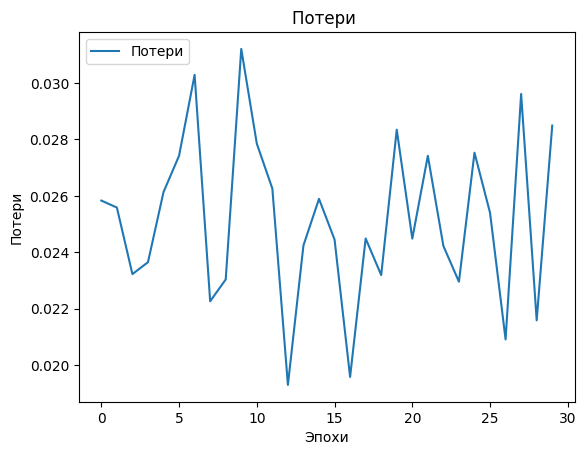

In [ ]:
losses = torch.Tensor(losses)
plt.plot(losses)
plt.title('Потери ')
plt.ylabel('Потери')
plt.xlabel('Эпохи')
plt.legend(['Потери'], loc='upper left')
plt.show()

In [ ]:
def im_convert(tensor):
    """ Display a tensor as an image. """

    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image.clip(0, 1)

    return image

In [ ]:
dataset[1]

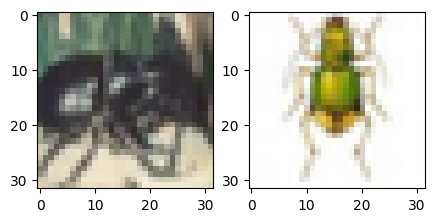

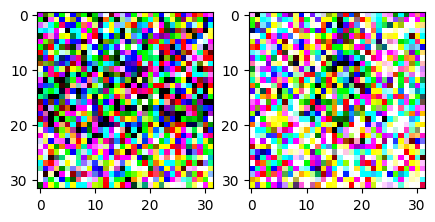

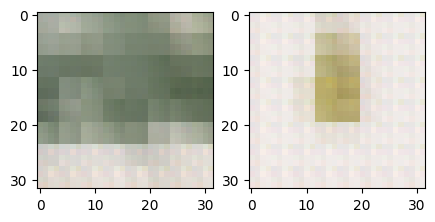

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))
ax1.imshow(im_convert(new_dataset[6][0]))
ax2.imshow(im_convert(new_dataset[7][0]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))
ax1.imshow(im_convert(new_dataset[6][0] + torch.randn_like(new_dataset[6][0])))
ax2.imshow(im_convert(new_dataset[7][0] + torch.randn_like(new_dataset[7][0])))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))
ax1.imshow(im_convert(model(new_dataset[6][0])))
ax2.imshow(im_convert(model(new_dataset[7][0])))

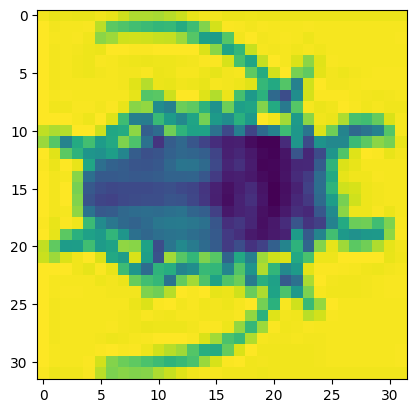

In [ ]:
for i, item in enumerate(image):
  #item = item.reshape(-1, 32, 32)
  plt.imshow(item[0].detach())

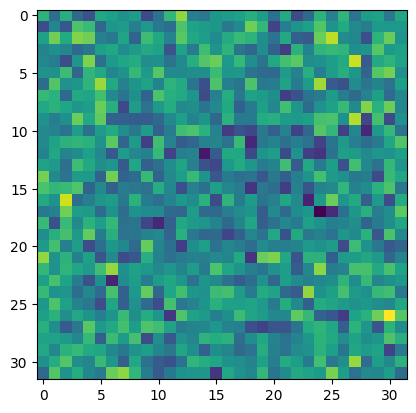

In [ ]:
for i, item in enumerate(noise_img):
  #item = item.reshape(-1, 32, 32)
  plt.imshow(item[0].detach())

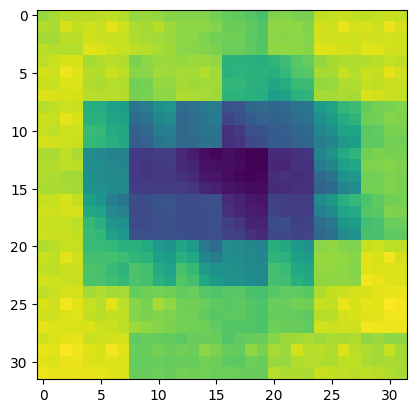

In [ ]:
for i, item in enumerate(reconstructed):
  #item = item.reshape(-1, 32, 32)
  plt.imshow(item[0].detach())